In [1]:
# TEAM MEMEBERS
# SUMEDH SS-23B1079
# SAGNIK NANDI-23B0905
# JAINENDRAJEET-23B1008
# Q3

import numpy as np
import matplotlib.pyplot as plt

values=[]
with open('../3.data') as f:
    for line in f:
        values.append(float(line.strip()))
        

data=np.array(values)

In [2]:
### Task A: Compute the first two (𝑖 = 1, 2) moments of 𝒟
moment1= data.mean()
data_squared=data**2
moment2= data_squared.mean()

print(f"1st moment of the data D is: \n {moment1} \n2nd moment of the data D is: \n {moment2}")

1st moment of the data D is: 
 6.496145618324817 
2nd moment of the data D is: 
 46.554361807879815


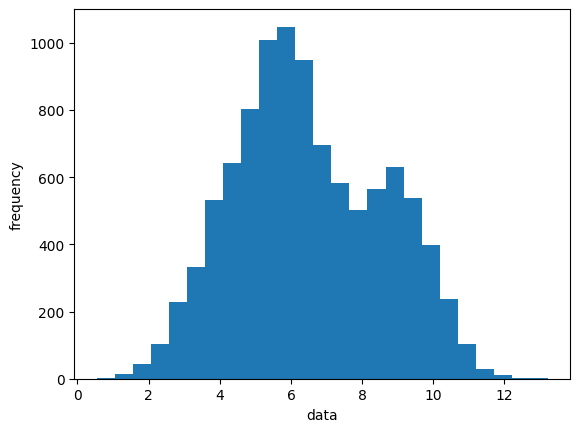

In [3]:
### Task B: Compute a histogram of the dataset and plot it
plt.hist(data, bins=25)
plt.xlabel("data")
plt.ylabel("frequency")
plt.savefig("../images/3b.png") 
plt.show()
## Estimating from the graph the mode is close to 6

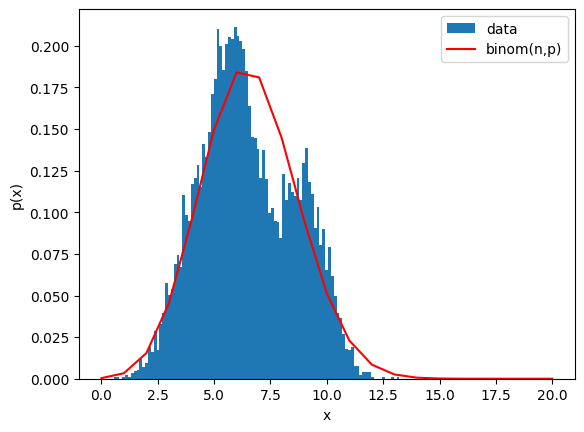

In [4]:
### Task C: Find the best-fit binomial distribution to 𝒟 

## 1. compute an expression for the first two moments 𝜇Bin1 , 𝜇Bin2 of the distribution Bin(𝑛, 𝑝)

# 𝜇Bin1=np (mean)
# 𝜇Bin2=np + (np)^2 - np^2 (var + mean^2)


## 2. compute a solution (𝑛, 𝑝) to 𝜇𝑖 = 𝜇Bin𝑖 , 𝑖 = 1, 2
from scipy.optimize import fsolve

def fBinom(x):
    # function that returns np-𝜇1 and np + (np)^2 - np^2 - 𝜇2
    return [
        x[0]*x[1]-moment1,
        x[0]*x[1] - x[0]*(x[1]**2) + (x[0]*x[1])**2 -moment2
    ]

rootBinom=fsolve(fBinom, [12, 0.5]) # initital guess based on np~=6
# [19.70400679  0.32968653]


from scipy.stats import binom
def errorBinom(n, p):
    # function that checks square error for the binomial-fit Binom(n,p) and actual data

    actual_pmf,_=np.histogram(data,bins=20,density=1)
    x=np.linspace(0,20,20).astype(int)
    expected_pmf=binom.pmf(x, n, p)

    return sum((expected_pmf-actual_pmf)**2)   # error metric

n_floor=np.floor(rootBinom[0])
n_ceil=np.ceil(rootBinom[0])
p_binm=rootBinom[1]

# n that gives lower square error in fitting is the best_n
error_n_floor=errorBinom(n_floor, p_binm)
error_n_ceil=errorBinom(n_ceil, p_binm)
best_n=n_ceil if error_n_ceil<error_n_floor else n_floor
rootBinom[0]=best_n
# n=20


## 3.  plot the binomial distribution Bin(𝑛∗ , 𝑝∗) on top of the histogram of 𝒟
x=np.linspace(0, 20, 20).astype(int)
binm=binom.pmf(x, rootBinom[0], rootBinom[1]) 

plt.hist(data, bins=100, density=True, label="data")
plt.plot(x, binm, 'r-', label=f"binom(n,p)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()

plt.savefig("../images/3c.png")
plt.show()

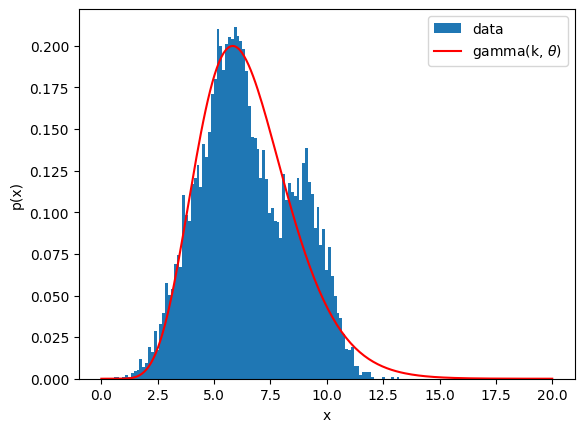

In [5]:
### Task D: find the best Gamma-distribution approximation to the true distribution of 𝒟
### 𝑓 (𝑥; 𝑘, 𝜃) = 1/[𝜃^𝑘 Γ(𝑘)] 𝑥^(𝑘−1) 𝑒−(𝑥/𝜃)

## 1. compute an expression for the first two moments 𝜇Gamma1 , 𝜇Gamma2 of the distribution Gamma(𝑘, 𝜃)
# 𝜇Gamma1 = k𝜃 
# 𝜇Gamma2 = k(k+1)𝜃^2


## 2. compute a solution (𝑘, 𝜃) to ˆ𝜇𝑖 = 𝜇Gamma𝑖 ,𝑖 = 1, 2
def fGamma(x):
    # function that return k𝜃-𝜇1 and k(k+1)𝜃^2-𝜇2
    return [
        x[0]*x[1]-moment1,
        x[0]*(x[1]**2) + (x[0]*x[1])**2 -moment2
    ]

rootGamma=fsolve(fGamma, [12,0.5]) # initital guess based on  k𝜃~=6
# [9.69120554 0.67031347]


## 3. plot the Gamma distribution Gamma(𝑘∗ , 𝜃∗) on top of the histogram of 𝒟
from scipy.stats import gamma
x=np.linspace(0, 20, 200)
gamm=gamma.pdf(x, rootGamma[0], scale=rootGamma[1])

plt.hist(data, bins=100, density=True, label="data")
plt.plot(x, gamm, 'r-', label=r"gamma(k, $\theta$)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()

plt.savefig("../images/3d.png")
plt.show()


In [6]:
### Task E: Calculate the average log-likelihood for both best-fit distributions.
# Likelihood, ℒ (𝜆0 | 𝑆) := P𝜆0 [𝑆] = product(𝑖=1 to n) P𝜆0 [𝑋𝑖] 
# Average log-likelihood, ℓ (𝜃 | 𝑆) := log ℒ (𝜃 | 𝑆) /𝑛 = [sum(i=1 to n) log P𝜆0 [𝑋𝑖]]/n 

x_binm=np.round(data)
x_gamm=data

y_binm= binom.pmf(x_binm, rootBinom[0], rootBinom[1])
y_gamm= gamma.pdf(x_gamm, rootGamma[0], scale=rootGamma[1])

# Likelihood is product of y_binm (or y_gamm) and 
# Average-log-likelihood is average of log values of y_binm (or y_gamm)
log_binm=np.log(y_binm)
log_gamm=np.log(y_gamm)

avg_log_lklhood_binm=log_binm.mean()
avg_log_lklhood_gamm=log_gamm.mean()
print(f"Average-log-likelihood in case of Binomial fit is: \n {avg_log_lklhood_binm} \nAverage-log-likelihood in case of Gamma fit is: \n {avg_log_lklhood_gamm}")

Average-log-likelihood in case of Binomial fit is: 
 -2.157068115434658 
Average-log-likelihood in case of Gamma fit is: 
 -2.160821772206641


3rd moment of the data D is: 
 360.56586952543273 
4th moment of the data D is: 
 2968.068491427333


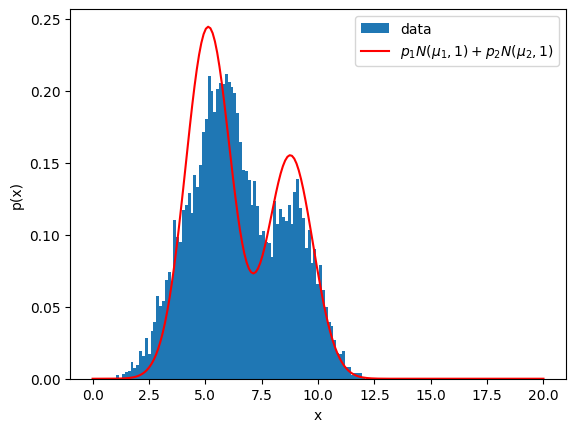

In [7]:
### Task F: We are going to assume now that our distribution is composed of a two-component Gaussian mixture
# P [𝑥] = 1/√2𝜋 [𝑝1 exp− (𝑥 − 𝜇1)^2/2 + 𝑝2 exp − (𝑥 − 𝜇2)2/2]

## 1. First, compute 𝜇𝑖 for 𝑖 = 3, 4
data_cubed=data**3
moment3= data_cubed.mean()
data_foured=data**4
moment4= data_foured.mean()

print(f"3rd moment of the data D is: \n {moment3} \n4th moment of the data D is: \n {moment4}")


## 2. compute a solution (𝜇1 , 𝑝1 , 𝜇2 , 𝑝2) to ˆ𝜇𝑖 = 𝜇gmmi , 𝑖 = 1, 2, 3, 4
# 𝜇gmm1 = 𝑝1𝜇1 + 𝑝2𝜇2.
# 𝜇gmm2 = 𝑝1(𝜎1^2 + 𝜇1^2) + 𝑝2(𝜎2^2 + 𝜇2^2).
# 𝜇gmm3 = 𝑝1(𝜇1^3 + 3𝜇1 𝜎1^2) + 𝑝2(𝜇2^3 + 3𝜇2 𝜎2^2 ).
# 𝜇gmm4 = 𝑝1(𝜇1^4 + 6𝜇1^2 𝜎1^2 + 3𝜎1^4 ) + 𝑝2(𝜇2^4 + 6𝜇2^2 𝜎2^2 + 3𝜎2^4)
# (here 𝜎1 = 𝜎2 = 1)

def fGMM(x):
    m1=x[0]
    m2=x[1]
    p1=x[2]
    p2=x[3]

    return [
        p1*m1 + p2*m2 -moment1,
        p1*(1+m1**2) + p2*(1+m2**2) -moment2,
        p1*(m1**3 + 3*m1) + p2*(m2**3 + 3*m2) -moment3,
        p1*(m1**4 + 6*m1**2 + 3) + p2*(m2**4 + 6*m2**2 + 3) -moment4
    ]

rootGMM=fsolve(fGMM, [6, 9, 0.7, 0.3])
# [5.12960769 8.77436305 0.61187403 0.38264565]


## 3.  plot the GMM distribution obtained on top of the histogram of 𝒟

from scipy.stats import norm
x=np.linspace(0, 20, 200)
g1=norm.pdf(x, loc=rootGMM[0], scale=1)     # N(m1, 1)
g2=norm.pdf(x, loc=rootGMM[1], scale=1)     # N(m2, 1)
gmm=rootGMM[2]*g1 + (1- rootGMM[2])*g2     # p1g1+ p2g2

plt.hist(data, bins=100, density=True, label="data")
plt.plot(x, gmm, 'r-', label=r"$p_1N(\mu_1, 1) + p_2N(\mu_2, 1)$")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()

plt.savefig("../images/3f.png")
plt.show()

In [8]:
## To finish, compute the average negative log-likelihood of the obtained GMM distribution.

x_gmm=data

y1_gmm=norm.pdf(x_gmm, loc=rootGMM[0], scale=1)     # N(m1, 1)
y2_gmm=norm.pdf(x_gmm, loc=rootGMM[1], scale=1)     # N(m2, 1)
y_gmm=rootGMM[2]*y1_gmm + (1- rootGMM[2])*y2_gmm    # p1y1+ p2y2

log_gmm=np.log(y_gmm)

avg_log_lklhood_gmm=log_gmm.mean()
print(f"Average-log-likelihood in case of Gaussian Mixture Model fit is: \n {avg_log_lklhood_gmm}")

Average-log-likelihood in case of Gaussian Mixture Model fit is: 
 -2.177736066805746
